In [1]:
import tweepy
import re
import pickle

In [2]:
from tweepy import OAuthHandler

In [3]:
# Initialising the Keys
consumer_key = '4LHdeUJ2DaBqcZ10mmsgnSdo2'
consumer_secret = 'KTFAXcLtVxblP4CQ2owetEH8BpspRGfHs9ASAqP0OUQJRPIdGC'
access_token = '2155427533-XtQDnv3Hzs1ROqIsk4hVMZ8E4x6dPw3Kpj40ShK'
access_secret = 'qjpcQCtZ0csaSSAZ2pr41Ahd0aNwaJ0JV9r0ccRfHJSY3'

In [5]:
# Client Authentication
auth = OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_secret)

In [6]:
args = ['facebook']
api = tweepy.API(auth,timeout=10)

In [8]:
# Fetch Real time Tweets
list_tweets = []
query = args[0]

if len(args) == 1:
    for status in tweepy.Cursor(api.search,q=query+" -filter:retweets",lang='en',result_type='recent').items(100):
        list_tweets.append(status.text)

In [11]:
len(list_tweets)

100

In [13]:
# Loading TFIDF model and classifier
with open('tfidfmodel.pickle','rb') as f:
    tfidf=pickle.load(f)

with open('classifier.pickle','rb') as f:
    clf = pickle.load(f)

In [18]:
# Data preprocessing and predicition

total_pos = 0
total_neg = 0

for tweet in list_tweets:
    # Removing all the link from start, in between of text and at end
    tweet = re.sub(r"^https://t.co/[a-zA-Z0-9]*\s"," ",tweet)
    tweet = re.sub(r"\s+https://t.co/[a-zA-Z0-9]*\s"," ",tweet)
    tweet = re.sub(r"\s+https://t.co/[a-zA-Z0-9]*$"," ",tweet)
    tweet = tweet.lower()
    tweet = re.sub(r"that's","that is",tweet)
    tweet = re.sub(r"there's","there is",tweet)
    tweet = re.sub(r"what's","what is",tweet)
    tweet = re.sub(r"where's","where is",tweet)
    tweet = re.sub(r"it's","it is",tweet)
    tweet = re.sub(r"who's","who is",tweet)
    tweet = re.sub(r"i'm","i am",tweet)
    tweet = re.sub(r"she's","she is",tweet)
    tweet = re.sub(r"he's","he is",tweet)
    tweet = re.sub(r"they're","they are",tweet)
    tweet = re.sub(r"who're","who are",tweet)
    tweet = re.sub(r"ain't","am not",tweet)
    tweet = re.sub(r"wouldn't","would not",tweet)
    tweet = re.sub(r"shouldn't","should not",tweet)
    tweet = re.sub(r"can't","can not",tweet)
    tweet = re.sub(r"couldn't","could not",tweet)
    tweet = re.sub(r"won't","will not",tweet)
    tweet = re.sub(r"\W"," ",tweet) # non word
    tweet = re.sub(r"\d"," ",tweet) #digits
    tweet = re.sub(r"s+[a-z]\s+"," ",tweet) # single charachter
    tweet = re.sub(r"\s+[a-z]$"," ",tweet) # single charachter at end
    tweet = re.sub(r"^[a-z]\s+"," ",tweet) # single charachter in start
    tweet = re.sub(r"\s+"," ",tweet)
    sent = clf.predict(tfidf.transform([tweet]).toarray())
    if sent[0] == 1:
        total_pos += 1
    else:
        total_neg += 1
        

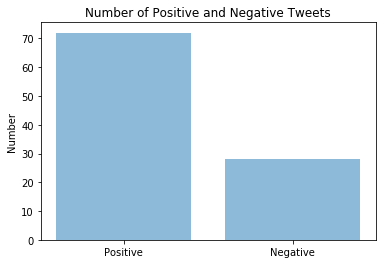

In [19]:
# plotting the Number of positive and negative tweets
import matplotlib.pyplot as plt
import numpy as np
objects = ["Positive","Negative"]
y_pos = np.arange(len(objects))

plt.bar(y_pos,[total_pos,total_neg],alpha=0.5)
plt.xticks(y_pos,objects)
plt.ylabel('Number')
plt.title('Number of Positive and Negative Tweets')

plt.show()